In [28]:
!pip3 install autoviml
!pip3 install graphviz
!pip3 install lightgbm
!pip3 install matplotlib
!pip3 install nltk
!pip3 install numpy
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install wordcloud

  Using cached autoviml-0.1.716-py3-none-any.whl.metadata (13 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached catboost-1.2.5-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached emoji-2.11.1-py2.py3-none-any.whl.metadata (5.3 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
  Using cached imbalanced_ensemble-0.2.1-py2.py3-none-any.whl.metadata (40 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached shap-0.45.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
  Using cached

In [43]:
import graphviz
import nltk
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import export_graphviz

from IPython.display import Image

nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/hady/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/hady/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/hady/nltk_data...
[nltk_data]    |   Pack

True

In [4]:
stemmer = SnowballStemmer(language="english")
english_stopwords = stopwords.words("english")

replaced_stopwords = ["xx", "xxxx"]

contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}


def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]


def tokenizeWithoutPunctuation(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]


def contr_to_exp(x):
    if type(x) is str:
        x = x.replace("\\", "")
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x


def get_top_ngram(corpus, n=None, wordscount=100):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[0:wordscount]


def expand_contractions(text):
    for key in contractions:
        value = contractions[key]
        text = text.replace(key, value)
    return text


def stopwords_remove(text):
    result = [word for word in text.split() if not word in replaced_stopwords]
    return " ".join(result)

READ

In [5]:
raw_df = pd.read_csv("./tmp/Customer_v2.csv")


CLEAN

In [36]:
def clean_text(x):
    if type(x) is str:
        x = x.replace("\\", "")
        result = []
        for token in word_tokenize(x):
            tokenlower = token.lower()

            if not token.isalpha():
                continue
            if tokenlower in replaced_stopwords:
                continue

            if tokenlower in contractions:
                result.append(contractions[tokenlower])
            else:
                result.append(tokenlower)

        return " ".join(result)
    else:
        return x


df = raw_df.rename(
    columns={
        "Date received": "date",
        "Product": "product",
        "Issue": "issue",
        "Consumer complaint narrative": "review",
        "Company public response": "response",
        "State": "state",
        "Submitted via": "source",
        "Consumer disputed?": "disputed",
    }
)

df = df.loc[df["disputed"].notna()]

df.issue = df.issue.apply(lambda x: clean_text(x))
df.review = df.review.apply(lambda x: clean_text(x))
df.response = df.response.apply(lambda x: clean_text(x))

df["issue_len"] = df.issue.apply(lambda x: len(x.split()))
df["review_len"] = df.review.apply(lambda x: len(x.split()))
df["response_len"] = df.response.apply(lambda x: len(x.split()))

GENERAL ANALYSIS

In [7]:
df.groupby('product').count()

,date,issue,review,response,state,source,disputed,issue_len,review_len,response_len
product,,,,,,,,,,
Bank account or service,5596,5596,5596,5596,5546,5596,5596,5596,5596,5596
Consumer Loan,2392,2392,2392,2392,2390,2392,2392,2392,2392,2392
Credit card,6065,6065,6065,6065,6041,6065,6065,6065,6065,6065
Credit reporting,12221,12221,12221,12221,12200,12221,12221,12221,12221,12221
Debt collection,11839,11839,11839,11839,11815,11839,11839,11839,11839,11839
Money transfers,228,228,228,228,217,228,228,228,228,228
Mortgage,11131,11131,11131,11131,11103,11131,11131,11131,11131,11131
Other financial service,70,70,70,70,69,70,70,70,70,70
Payday loan,413,413,413,413,413,413,413,413,413,413


In [39]:
review_vectorizer = TfidfVectorizer(
    tokenizer=tokenizeWithoutPunctuation,
    stop_words=english_stopwords,
    ngram_range=(1, 2),
    max_features=2000,
)
review_vectorizer.fit(df.review)
review_inputs =  review_vectorizer.transform(df.review)


/home/hady/sources/dsai/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/hady/sources/dsai/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


In [52]:
# df['review_vector'] = review_inputs

review_df = pd.DataFrame(review_inputs, index=df.index)
review_df.head()
review_inputs
print(review_inputs)

  (0, 1938)	0.0980367181862831
  (0, 1569)	0.17067969127682117
  (0, 1553)	0.20547979250550824
  (0, 1552)	0.1827915323741769
  (0, 1491)	0.13515110566816843
  (0, 1375)	0.14627902946956897
  (0, 1336)	0.14650679103330275
  (0, 1308)	0.09140889875630273
  (0, 1296)	0.25547869156979863
  (0, 1207)	0.12437015307047557
  (0, 1148)	0.09105433874551627
  (0, 1097)	0.14086266402265749
  (0, 1061)	0.0900426298080882
  (0, 1041)	0.12311173183341587
  (0, 957)	0.0991946697357202
  (0, 945)	0.1418612618140665
  (0, 936)	0.1189479811237674
  (0, 905)	0.29186906865854273
  (0, 886)	0.18096830080516654
  (0, 881)	0.11978482857227014
  (0, 776)	0.11579088002133724
  (0, 688)	0.20150372019362167
  (0, 687)	0.2905617740325879
  (0, 664)	0.12289021376517793
  (0, 578)	0.20292992151897463
  :	:
  (51343, 635)	0.09489119203486651
  (51343, 625)	0.09038875444834363
  (51343, 608)	0.0776608333720671
  (51343, 549)	0.06669829869418199
  (51343, 548)	0.10556801137330143
  (51343, 546)	0.06157040347232089
  (

In [40]:
response_vectorizer = TfidfVectorizer(
    tokenizer=tokenizeWithoutPunctuation,
    stop_words=english_stopwords,
    ngram_range=(1, 2),
    max_features=2000,
)
response_vectorizer.fit(df.response)
response_inputs =  response_vectorizer.transform(df.response)


<Axes: >

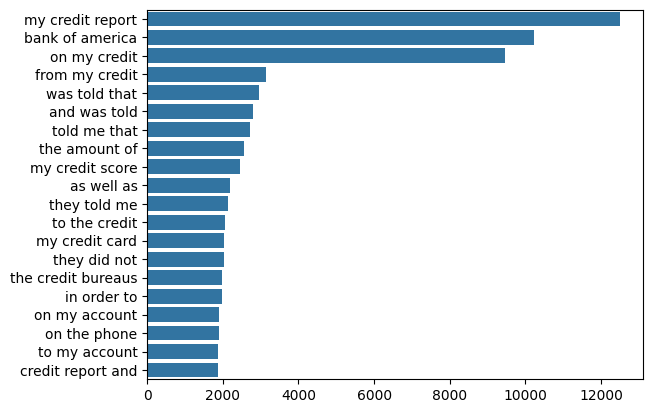

In [9]:
topn = get_top_ngram(df.review, 3, 20)
x, y = map(list, zip(*topn))
sns.barplot(x=y, y=x)

<Axes: >

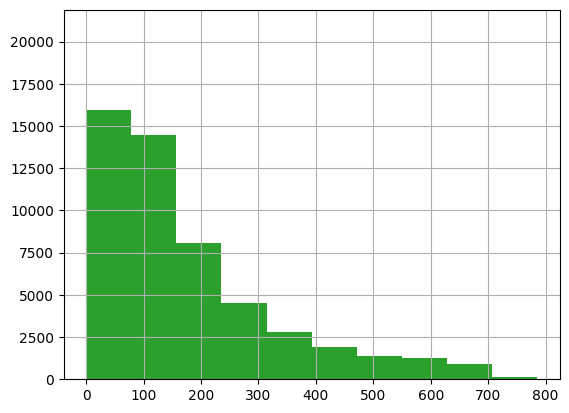

In [10]:
df.response_len.hist()
df.issue_len.hist()
df.review_len.hist()

SENTIMENT ANALYSIS

In [37]:
sid = SentimentIntensityAnalyzer()

def sentiment_analysis(x):
    polarity =  sid.polarity_scores(x)
    # print(polarity)
    compound = polarity['compound']
    # if compound >= 0: 
    #     return '1' # pos
    # else:
    #     return '0' # neg
    return compound

def disputed_map(x):
    if x == 'Yes': 
        return '1'
    else:
        return '0'
    
df['issue_sentiment'] = df.issue.apply(lambda text: sentiment_analysis(text))
df['review_sentiment'] = df.review.apply(lambda text: sentiment_analysis(text))
df['response_sentiment'] = df.response.apply(lambda text: sentiment_analysis(text))
df['disputed_number'] = df.disputed.apply(lambda text: disputed_map(text))

DISPUTE ANALYSIS 1 - Random Forest

In [38]:
features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        "disputed_number",
    ],
    axis=1,
)
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=11
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))


# text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# text_clf.fit(x_train, y_train)
# pred = text_clf.predict(x_test)
# print(classification_report(y_test, pred))

# print(text_clf.predict(['this product is crap']))

# print(classification_report(df.label, df.comp_score))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      7782
           1       0.29      0.14      0.18      2487

    accuracy                           0.71     10269
   macro avg       0.53      0.51      0.50     10269
weighted avg       0.65      0.71      0.67     10269



Text(0.5, 427.9555555555555, 'Predicted label')

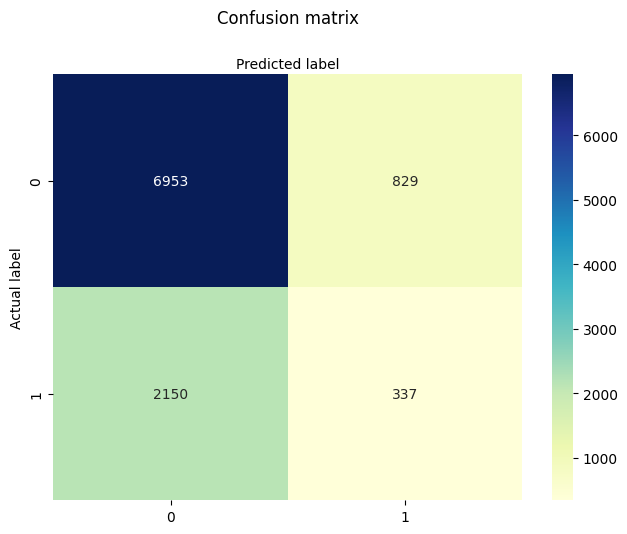

In [45]:

cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


DISPLAYS

In [42]:
# raw_df
# df
# len(review_vectorizer.vocabulary_)
# review_vectorizer.get_feature_names_out()[:200]
# review_inputs.shape
# review_inputs.toarray()[0][:100]

# replaced_stopwords
# df.head()
# df.loc[df["disputed"] == 1]


# df2 = df.copy()
# # df2
# # df["review"].str.split()
# # df2
# # df2.review[2]
# df2["has_not"] = df2.review.apply(lambda x: "not" in x.split())

# df2 = df2.loc[df2["has_not"] == False]
# df2

# "not" in replaced_stopwords

# for token in word_tokenize(df2.review[12]):




AttributeError: 'csr_matrix' object has no attribute 'head'